In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import citipy

import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

751

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
url


'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7494a5ce4e82f5a4acbebabf2c8c4a15'

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | newport
Processing Record 2 of Set 1 | chuy
Processing Record 3 of Set 1 | saint-philippe
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | coihaique
Processing Record 6 of Set 1 | bathsheba
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 10 of Set 1 | kaitangata
Processing Record 11 of Set 1 | conde
Processing Record 12 of Set 1 | ilheus
Processing Record 13 of Set 1 | lompoc
Processing Record 14 of Set 1 | devitsa
Processing Record 15 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | gasa
Processing Record 18 of Set 1 | show low
Processing Record 19 of Set 1 | urubamba
Processing Record 20 of Set 1 | darhan
Processing Record 21 of Set 1 | nanma
Processing Recor

Processing Record 40 of Set 4 | taoudenni
Processing Record 41 of Set 4 | tubuala
Processing Record 42 of Set 4 | ploemeur
Processing Record 43 of Set 4 | puerto del rosario
Processing Record 44 of Set 4 | santa luzia
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | san patricio
Processing Record 49 of Set 4 | lata
Processing Record 50 of Set 4 | manono
Processing Record 1 of Set 5 | kennewick
Processing Record 2 of Set 5 | tabou
Processing Record 3 of Set 5 | ayan
Processing Record 4 of Set 5 | dekoa
City not found. Skipping...
Processing Record 5 of Set 5 | henties bay
Processing Record 6 of Set 5 | balabac
Processing Record 7 of Set 5 | manggar
Processing Record 8 of Set 5 | disna
Processing Record 9 of Set 5 | clyde river
Processing Record 10 of Set 5 | port lincoln
Processing Record 11 of Set 5 | kilindoni
Processing Record 12 of Set 5 | masyaf
Processing Record 13 of Set 5 |

Processing Record 30 of Set 8 | ocean city
Processing Record 31 of Set 8 | lucea
Processing Record 32 of Set 8 | jalpan
Processing Record 33 of Set 8 | katherine
Processing Record 34 of Set 8 | mae sai
Processing Record 35 of Set 8 | severo-kurilsk
Processing Record 36 of Set 8 | vadso
Processing Record 37 of Set 8 | sinegorye
Processing Record 38 of Set 8 | yumen
Processing Record 39 of Set 8 | sioux lookout
Processing Record 40 of Set 8 | barentu
Processing Record 41 of Set 8 | nuevo ideal
Processing Record 42 of Set 8 | ahipara
Processing Record 43 of Set 8 | saint george
Processing Record 44 of Set 8 | capanema
Processing Record 45 of Set 8 | bukama
Processing Record 46 of Set 8 | flinders
Processing Record 47 of Set 8 | nadaun
Processing Record 48 of Set 8 | kirovsk
Processing Record 49 of Set 8 | northam
Processing Record 50 of Set 8 | general roca
Processing Record 1 of Set 9 | kavaratti
Processing Record 2 of Set 9 | burgos
Processing Record 3 of Set 9 | bertoua
Processing Reco

Processing Record 24 of Set 12 | obo
Processing Record 25 of Set 12 | svetlogorsk
Processing Record 26 of Set 12 | cockburn harbour
City not found. Skipping...
Processing Record 27 of Set 12 | bera
Processing Record 28 of Set 12 | traverse city
Processing Record 29 of Set 12 | alice springs
Processing Record 30 of Set 12 | lehigh acres
Processing Record 31 of Set 12 | kuragino
Processing Record 32 of Set 12 | ambovombe
Processing Record 33 of Set 12 | necochea
Processing Record 34 of Set 12 | ziduri
Processing Record 35 of Set 12 | paita
Processing Record 36 of Set 12 | marrakesh
Processing Record 37 of Set 12 | paraiso
Processing Record 38 of Set 12 | ylojarvi
Processing Record 39 of Set 12 | sergeyevka
Processing Record 40 of Set 12 | nyurba
Processing Record 41 of Set 12 | mananjary
Processing Record 42 of Set 12 | amga
Processing Record 43 of Set 12 | lexington
Processing Record 44 of Set 12 | aklavik
Processing Record 45 of Set 12 | oranjemund
Processing Record 46 of Set 12 | zhel

In [8]:
len(city_data)

699

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Newport,51.5877,-2.9984,38.53,78,2,7.18,GB,2022-04-09 04:32:49
1,Chuy,-33.6971,-53.4616,63.41,94,2,4.07,UY,2022-04-09 04:36:28
2,Saint-Philippe,-21.3585,55.7679,80.22,84,57,10.83,RE,2022-04-09 04:30:35
3,Punta Arenas,-53.1500,-70.9167,41.11,87,20,6.91,CL,2022-04-09 04:30:40
4,Coihaique,-45.5752,-72.0662,40.95,100,0,1.14,CL,2022-04-09 04:36:28
5,Bathsheba,13.2167,-59.5167,75.81,83,75,25.32,BB,2022-04-09 04:36:28
6,San Cristobal,7.7669,-72.2250,69.98,84,94,2.04,VE,2022-04-09 04:36:29
7,Dikson,73.5069,80.5464,9.88,88,99,7.92,RU,2022-04-09 04:34:57
8,Kaitangata,-46.2817,169.8464,60.15,63,23,9.13,NZ,2022-04-09 04:36:29
9,Conde,-7.2597,-34.9075,76.46,94,20,4.61,BR,2022-04-09 04:36:29


In [12]:
#Reorder the DF columns
new_column_order = ["City","Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

# Rearrange the column order in the DF
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Newport,GB,2022-04-09 04:32:49,51.5877,-2.9984,38.53,78,2,7.18
1,Chuy,UY,2022-04-09 04:36:28,-33.6971,-53.4616,63.41,94,2,4.07
2,Saint-Philippe,RE,2022-04-09 04:30:35,-21.3585,55.7679,80.22,84,57,10.83
3,Punta Arenas,CL,2022-04-09 04:30:40,-53.1500,-70.9167,41.11,87,20,6.91
4,Coihaique,CL,2022-04-09 04:36:28,-45.5752,-72.0662,40.95,100,0,1.14
5,Bathsheba,BB,2022-04-09 04:36:28,13.2167,-59.5167,75.81,83,75,25.32
6,San Cristobal,VE,2022-04-09 04:36:29,7.7669,-72.2250,69.98,84,94,2.04
7,Dikson,RU,2022-04-09 04:34:57,73.5069,80.5464,9.88,88,99,7.92
8,Kaitangata,NZ,2022-04-09 04:36:29,-46.2817,169.8464,60.15,63,23,9.13
9,Conde,BR,2022-04-09 04:36:29,-7.2597,-34.9075,76.46,94,20,4.61


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

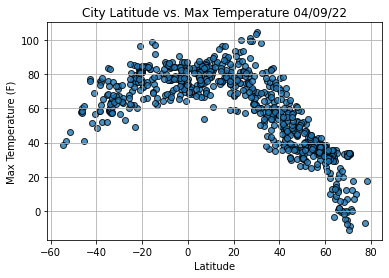

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Lat_Vs_Max_Temp.png")

# Show plot.
plt.show()

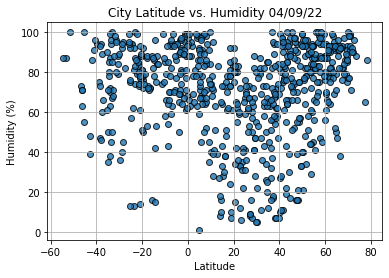

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Humidity.png")
# Show plot.
plt.show()

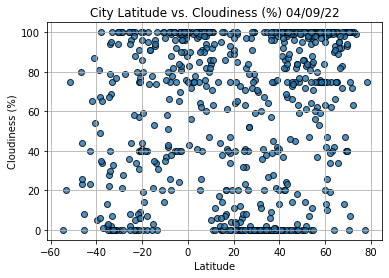

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Cloudiness.png")
# Show plot.
plt.show()

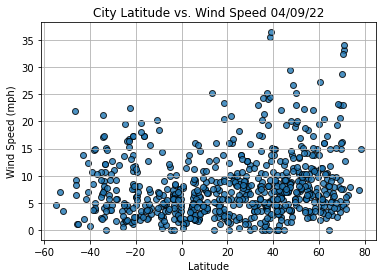

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Lat_VS_Wind_Speed.png")
# Show plot.
plt.show()